In [114]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import great_tables as tg
from babel.dates import match_skeleton

In [3]:
df = pl.read_csv("../../DATA/penguins_size.csv")

In [5]:
df = df.filter(
    pl.col('sex') != 'NA'
)

In [6]:
df.with_columns(
    cs.all() == 'NA'
).sum()

species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0


In [7]:
X = df.select(cs.exclude('species')).to_dummies(drop_first=True)

In [8]:
# y = pl.Series(df.select('species'))
# y = df.select('species').to_series()
y = df.get_column('species')

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()

In [11]:
y_encoded = label_encoder.fit_transform(y)

In [12]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [71]:
for encoded_value, species_name in enumerate(label_encoder.classes_):
    print(f'{encoded_value}: {species_name}')

0: Adelie
1: Chinstrap
2: Gentoo


In [68]:
encoded_values

['0',
 ':',
 ' ',
 'A',
 'd',
 'e',
 'l',
 'i',
 'e',
 '1',
 ':',
 ' ',
 'C',
 'h',
 'i',
 'n',
 's',
 't',
 'r',
 'a',
 'p',
 '2',
 ':',
 ' ',
 'G',
 'e',
 'n',
 't',
 'o',
 'o']

In [48]:
label_encoder.inverse_transform(predictions)

column_0
str
"""Chinstrap"""
"""Gentoo"""
"""Adelie"""
"""Chinstrap"""
"""Adelie"""
…
"""Adelie"""
"""Adelie"""
"""Adelie"""


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
forest_model = RandomForestClassifier(
    n_estimators=10,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
)

In [41]:
forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [42]:
predictions = forest_model.predict(X_test)

In [43]:
pl.Series('predictions', predictions)

predictions
i64
1
2
0
1
0
…
0
0
0


In [52]:
pl.DataFrame({
    'actual': y_test,
    'decoded_actual': label_encoder.inverse_transform(y_test),
    'predictions': predictions,
    'decoded_predictions': label_encoder.inverse_transform(predictions),
    'decoded_error': label_encoder.inverse_transform(predictions) != label_encoder.inverse_transform(y_test)
})

actual,decoded_actual,predictions,decoded_predictions,decoded_error
i64,str,i64,str,bool
0,"""Adelie""",1,"""Chinstrap""",true
2,"""Gentoo""",2,"""Gentoo""",false
0,"""Adelie""",0,"""Adelie""",false
1,"""Chinstrap""",1,"""Chinstrap""",false
0,"""Adelie""",0,"""Adelie""",false
…,…,…,…,…
0,"""Adelie""",0,"""Adelie""",false
1,"""Chinstrap""",0,"""Adelie""",true
0,"""Adelie""",0,"""Adelie""",false


In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay

In [54]:
accuracy_score(y_test, predictions)

0.7524752475247525

In [60]:
confusion_matrix(y_test, predictions)

array([[39,  3,  7],
       [15,  3,  0],
       [ 0,  0, 34]])

In [77]:
target_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

      Adelie       0.72      0.80      0.76        49
   Chinstrap       0.50      0.17      0.25        18
      Gentoo       0.83      1.00      0.91        34

    accuracy                           0.75       101
   macro avg       0.68      0.65      0.64       101
weighted avg       0.72      0.75      0.72       101



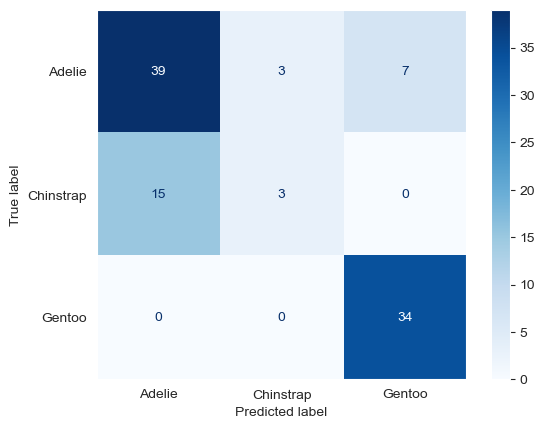

In [81]:
display_labels = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

ConfusionMatrixDisplay.from_predictions(
    y_test, predictions,
    cmap='Blues',
    display_labels=display_labels
).ax_.gri(False)

In [103]:
pl.DataFrame({
    "feature": list(X_test.columns),
    "importance": forest_model.feature_importances_
}).sort(by='importance', descending=True).filter(
    pl.col('importance') > 0.01
)

feature,importance
str,f64
"""island_Biscoe""",0.144493
"""island_Dream""",0.073823
"""body_mass_g_3800""",0.017214
"""flipper_length_mm_190""",0.016534
"""flipper_length_mm_215""",0.013213
…,…
"""flipper_length_mm_210""",0.011563
"""culmen_depth_mm_17.2""",0.011167
"""culmen_depth_mm_17.3""",0.011114


In [109]:
test_error = []

for k in range(1, 101):
    forest_model = RandomForestClassifier(
        n_estimators=k,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )
    forest_model.fit(X_train, y_train)
    predictions = forest_model.predict(X_test)
    test_error.append(1 - accuracy_score(y_test, predictions))

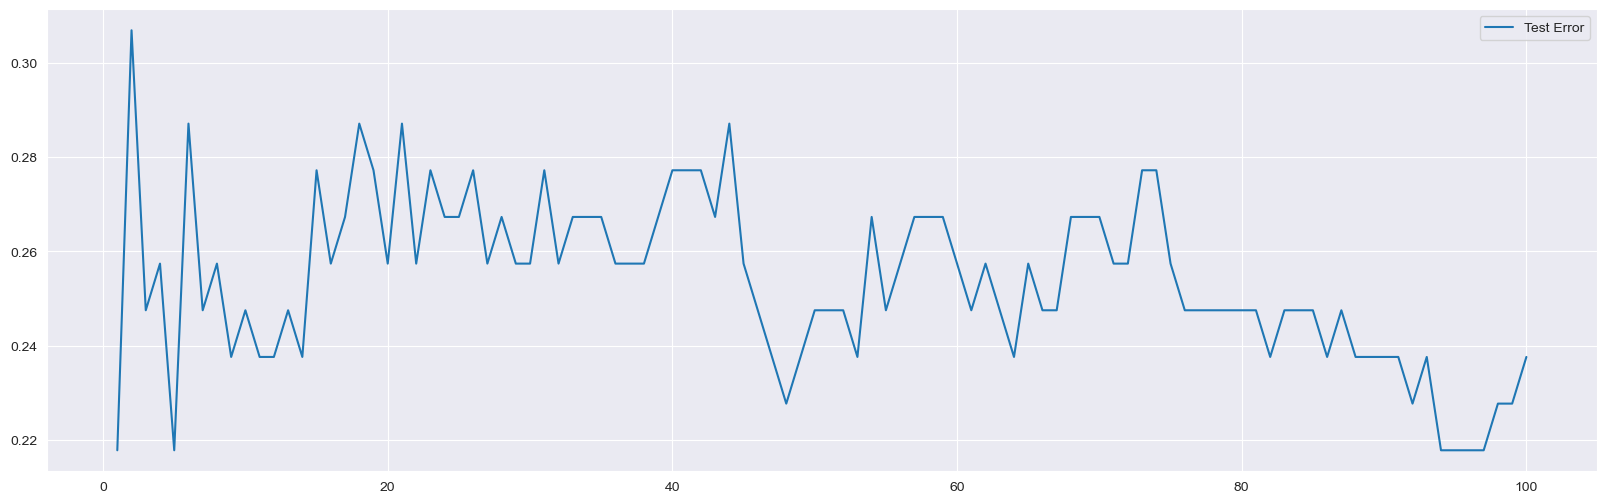

In [113]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 101), test_error, label='Test Error')
plt.legend()

In [117]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=list(range(1, 101)),
        y=test_error,
        mode='lines+markers',
        name='Test Error'
    )
)

fig.update_layout(
    title='Test Error vs. Number of Trees',
    xaxis_title='Number of Trees',
    yaxis_title='Test Error',
    font=dict(
        family='Courier New, monospace',
        size=18,
        color='#7f7f7f'
    )
)

In [124]:
forest_model = RandomForestClassifier(
    n_estimators=94,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
)

In [125]:
forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=94, n_jobs=-1, random_state=42)

In [126]:
predictions = forest_model.predict(X_test)

In [127]:
pl.DataFrame({
    'actual': y_test,
    'decoded_actual': label_encoder.inverse_transform(y_test),
    'predictions': predictions,
    'decoded_predictions': label_encoder.inverse_transform(predictions),
    'decoded_error': label_encoder.inverse_transform(predictions) != label_encoder.inverse_transform(y_test)
})

actual,decoded_actual,predictions,decoded_predictions,decoded_error
i64,str,i64,str,bool
0,"""Adelie""",1,"""Chinstrap""",true
2,"""Gentoo""",2,"""Gentoo""",false
0,"""Adelie""",0,"""Adelie""",false
1,"""Chinstrap""",1,"""Chinstrap""",false
0,"""Adelie""",2,"""Gentoo""",true
…,…,…,…,…
0,"""Adelie""",0,"""Adelie""",false
1,"""Chinstrap""",1,"""Chinstrap""",false
0,"""Adelie""",0,"""Adelie""",false


In [128]:
accuracy_score(y_test, predictions) # 0.7524752475247525

0.7821782178217822

In [130]:
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

      Adelie       0.86      0.65      0.74        49
   Chinstrap       0.68      0.72      0.70        18
      Gentoo       0.76      1.00      0.86        34

    accuracy                           0.78       101
   macro avg       0.77      0.79      0.77       101
weighted avg       0.80      0.78      0.78       101



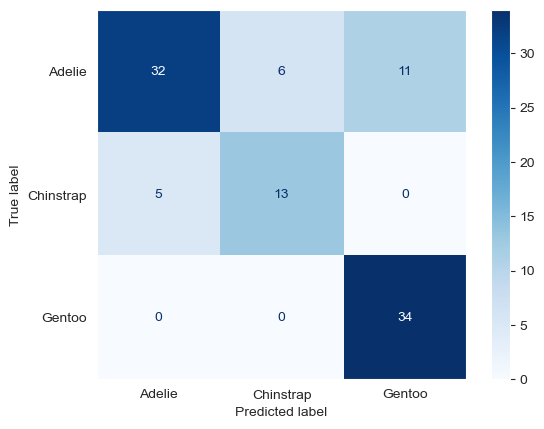

In [137]:
ConfusionMatrixDisplay.from_predictions(
    y_test, predictions,
    cmap='Blues',
    display_labels=display_labels
).ax_.grid(False)

In [138]:
df = pl.read_csv("../../DATA/data_banknote_authentication.csv")

In [139]:
df

Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
f64,f64,f64,f64,i64
3.6216,8.6661,-2.8073,-0.44699,0
4.5459,8.1674,-2.4586,-1.4621,0
3.866,-2.6383,1.9242,0.10645,0
3.4566,9.5228,-4.0112,-3.5944,0
0.32924,-4.4552,4.5718,-0.9888,0
…,…,…,…,…
0.40614,1.3492,-1.4501,-0.55949,1
-1.3887,-4.8773,6.4774,0.34179,1
-3.7503,-13.4586,17.5932,-2.7771,1


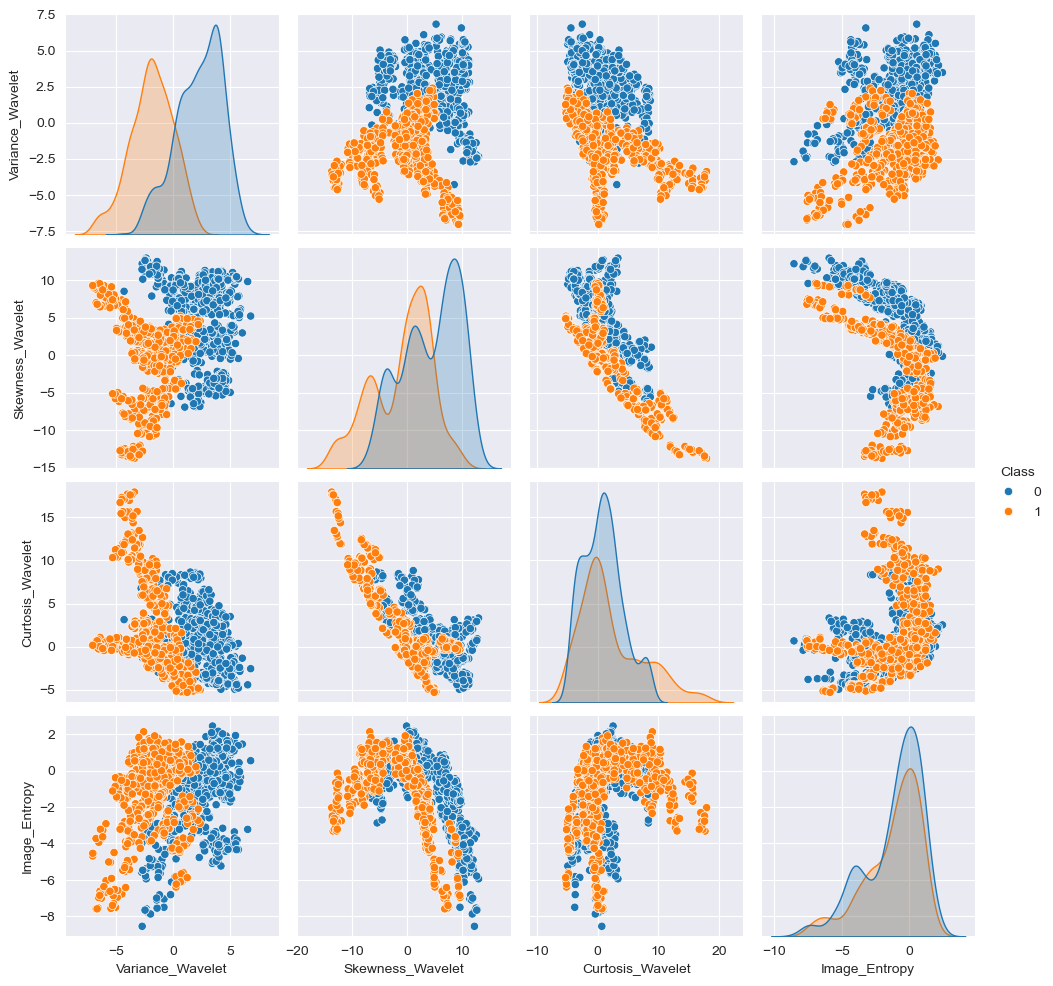

In [142]:
sns.pairplot(df.to_pandas(), hue='Class')
plt.show()

In [143]:
X = df.select(cs.exclude('Class'))

In [144]:
y = df.select('Class').to_series()

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
forest_classifier = RandomForestClassifier()

In [149]:
from sklearn.model_selection import GridSearchCV

In [163]:
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True],
    'oob_score': [True, False],
}

In [164]:
grid_model = GridSearchCV(
    estimator=forest_classifier,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
)

In [165]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100],
                         'oob_score': [True, False]})

In [166]:
grid_model.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'n_estimators': 60,
 'oob_score': False}

In [171]:
predictions = grid_model.predict(X_test)

In [172]:
accuracy_score(y_test, predictions)

0.9951456310679612

In [173]:
confusion_matrix(y_test, predictions)

array([[229,   0],
       [  2, 181]])

In [178]:
target_names = label_encoder.classes_
print(classification_report(
    y_test, predictions,
    target_names=target_names,
    labels=range(len(target_names)),
    zero_division=0
))

              precision    recall  f1-score   support

      Adelie       0.99      1.00      1.00       229
   Chinstrap       1.00      0.99      0.99       183
      Gentoo       0.00      0.00      0.00         0

    accuracy                           1.00       412
   macro avg       0.66      0.66      0.66       412
weighted avg       1.00      1.00      1.00       412



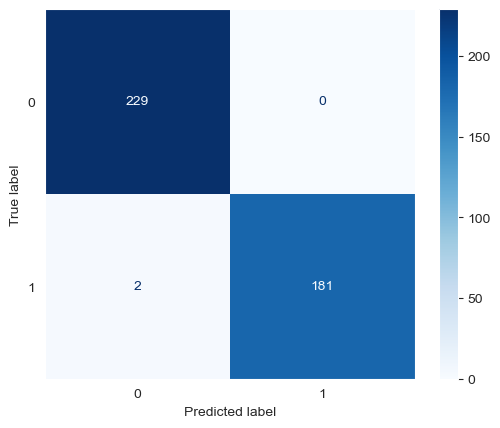

In [180]:
correct_labels = list(set(y_test))

ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues', display_labels=correct_labels).ax_.grid(False)

In [182]:
label_encoder.inverse_transform(predictions)

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Chinstrap',

In [183]:
for encoded_value, species_name in enumerate(label_encoder.classes_):
    print(f'{encoded_value}: {species_name}')

0: Adelie
1: Chinstrap
2: Gentoo


In [186]:
grid_model.best_estimator_

RandomForestClassifier(n_estimators=60)

In [187]:
errors = []
misclassifications = []

for n in range(1, 64):
    forest_classifier = RandomForestClassifier(
        n_estimators=n,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1,
    )
    forest_classifier.fit(X_train, y_train)
    predictions = forest_classifier.predict(X_test)
    errors.append(1 - accuracy_score(y_test, predictions))

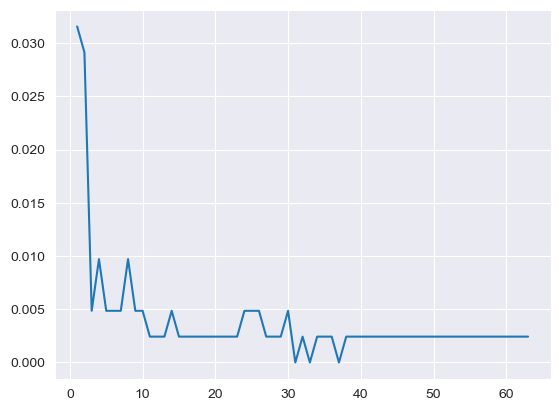

In [188]:
plt.plot(range(1,64),errors)